In [1]:
from glob import glob
import SimpleITK as sitk
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
KAGGLE_DATASET_PATH = "/mnt/DATASETS/KAGGLE/"
MASK_IMAGE_FORMAT = ".nii.gz"

In [3]:
def get_id_kaggle_image(path):
    return path.split("/")[-1]

def load_kaggle_image(path):    
    reader = sitk.ImageSeriesReader()
    dicom_names = reader.GetGDCMSeriesFileNames(path)
    reader.SetFileNames(dicom_names)
    image = reader.Execute()
    return image

def get_id_kaggle_mask(path):
    return tuple(path.split("/")[-1].split(MASK_IMAGE_FORMAT)[0].split("_"))

In [4]:
kaggle_images_paths = glob(KAGGLE_DATASET_PATH + "stage1/*")
kaggle_images_paths_by_id = {get_id_kaggle_image(path): path for path in kaggle_images_paths}

kaggle_segmentation_paths = glob(KAGGLE_DATASET_PATH + "seg-lungs-KAGGLE-all/*" + MASK_IMAGE_FORMAT)
kaggle_segmentation_paths_by_id = {get_id_kaggle_mask(path): path for path in kaggle_segmentation_paths}

In [5]:
# PUT HERE THE KAGGLE IMAGE ID YOU WANT TO LOAD THE SEGMENTATIONS FOR
kaggle_id = list(kaggle_segmentation_paths_by_id.keys())[0][0]

In [6]:
img_kaggle = load_kaggle_image(kaggle_images_paths_by_id[kaggle_id])
kaggle_id_segmentation_paths = {k: v for k,v in kaggle_segmentation_paths_by_id.items() if k[0] == kaggle_id}
mask_images = {}
for image_ids, mask_path in kaggle_id_segmentation_paths.items():
    _, luna_id = image_ids
    mask_image = sitk.ReadImage(mask_path)
    mask_images[luna_id] = mask_image

In [7]:
numpy_img_kaggle = sitk.GetArrayFromImage(img_kaggle)
numpy_mask_images = {}
for mask_id, mask_image in mask_images.items():
    numpy_mask_images[mask_id] = sitk.GetArrayFromImage(mask_image) > 0

Display original image with the different masks obtained after registration side by side


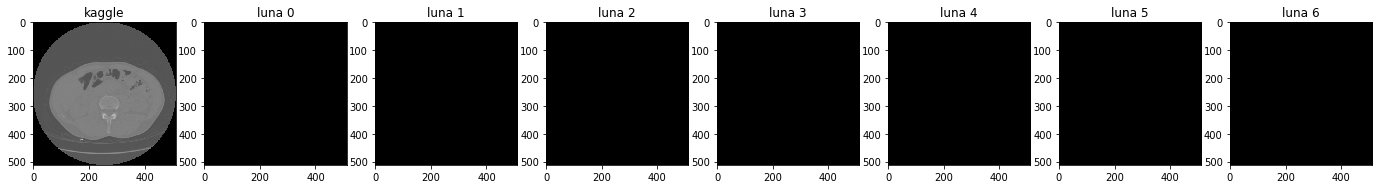

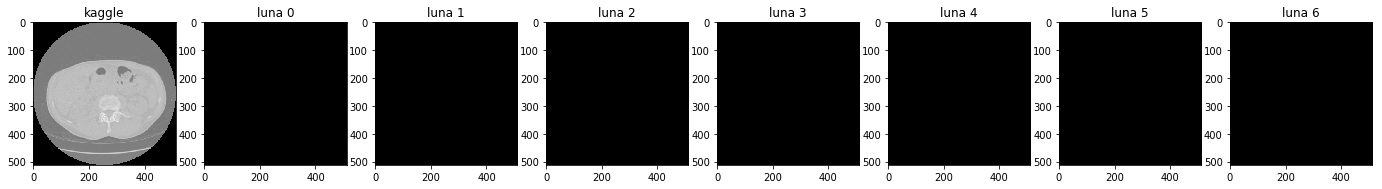

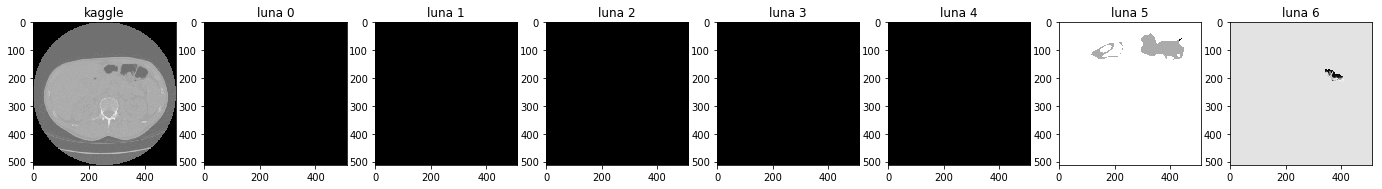

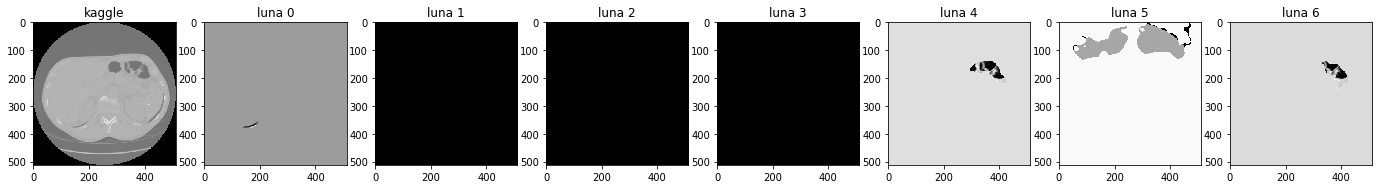

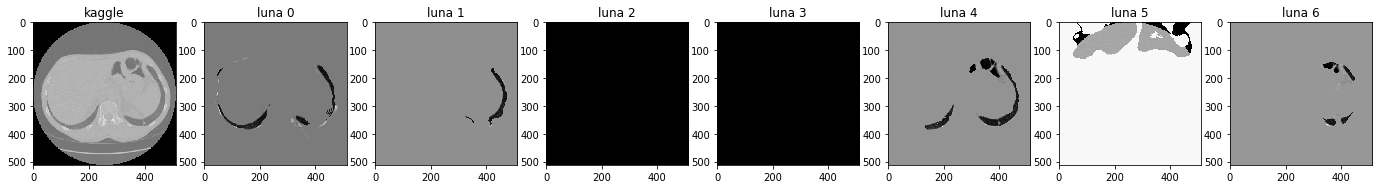

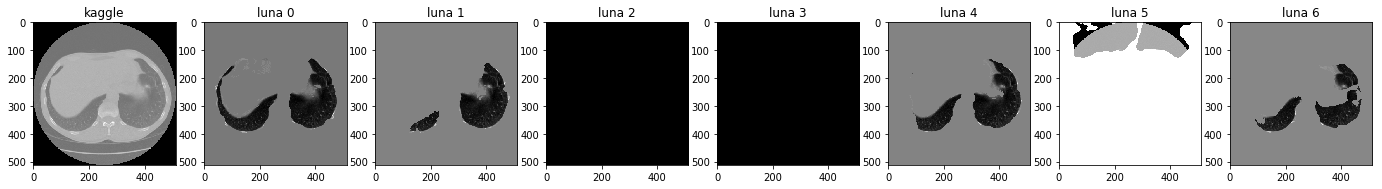

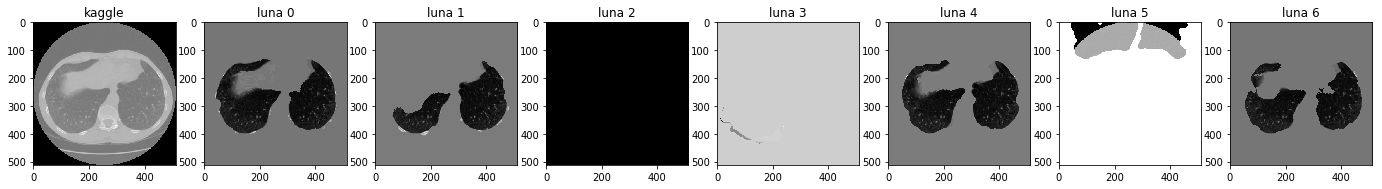

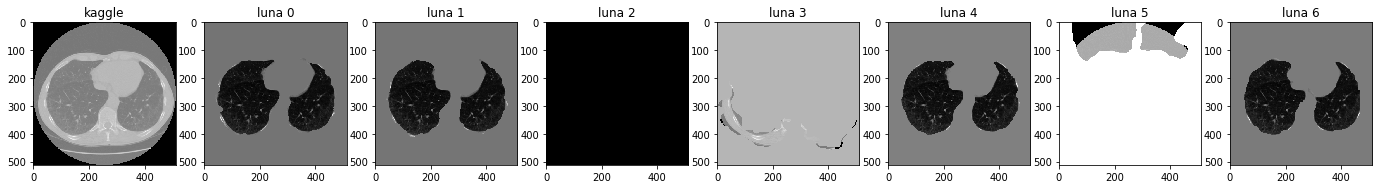

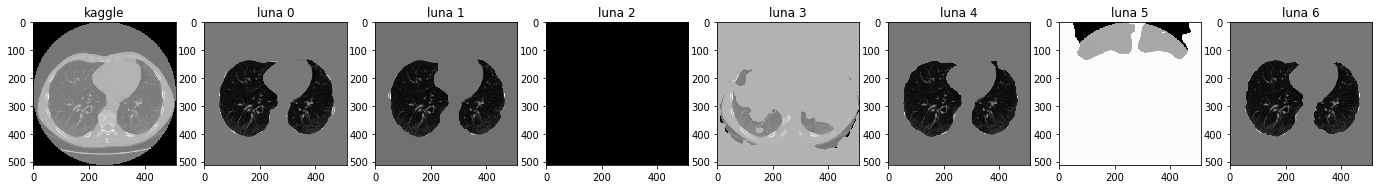

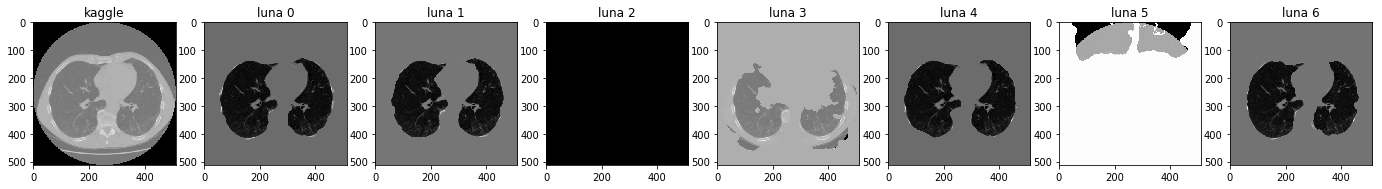

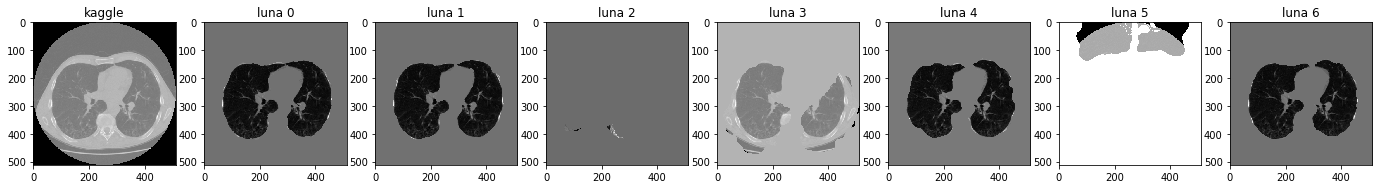

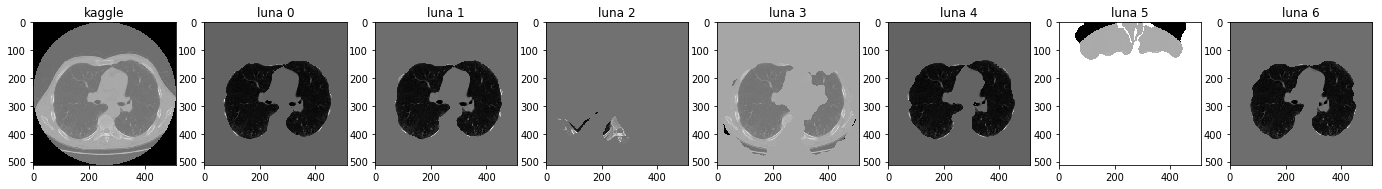

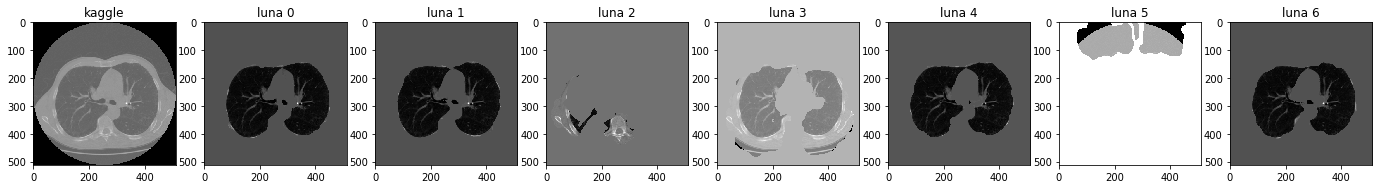

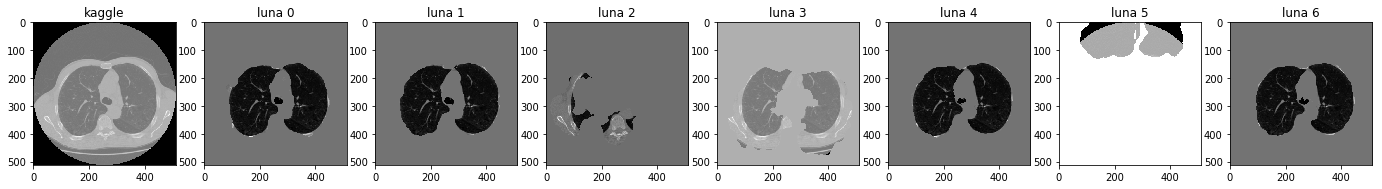

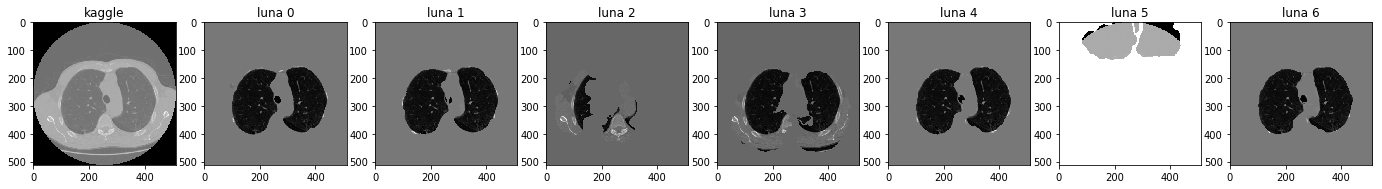

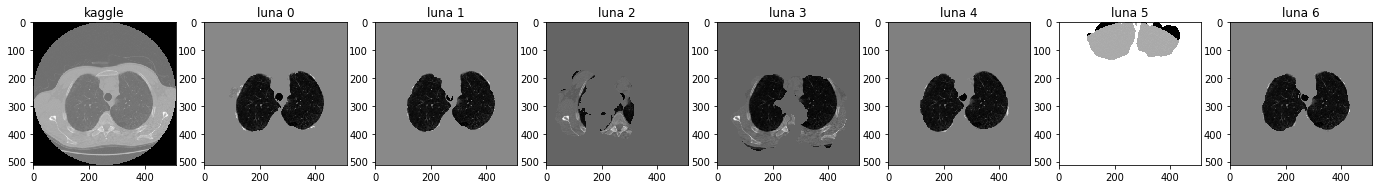

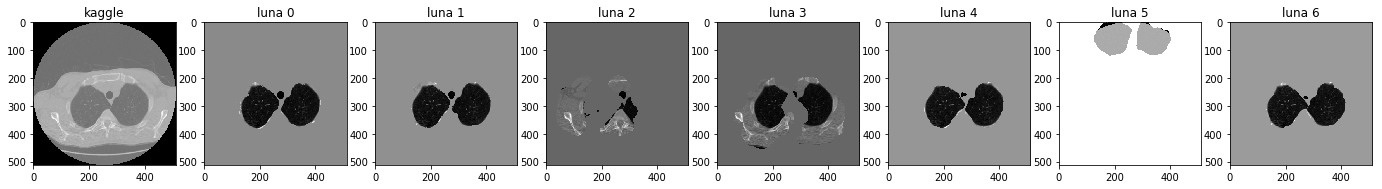

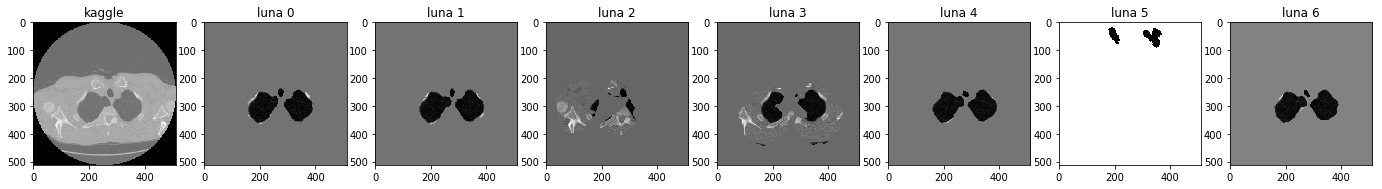

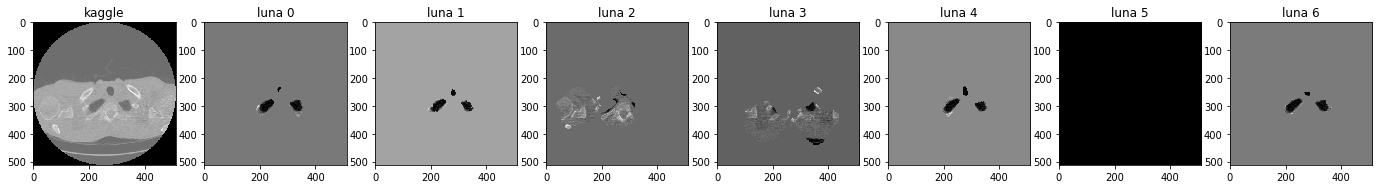

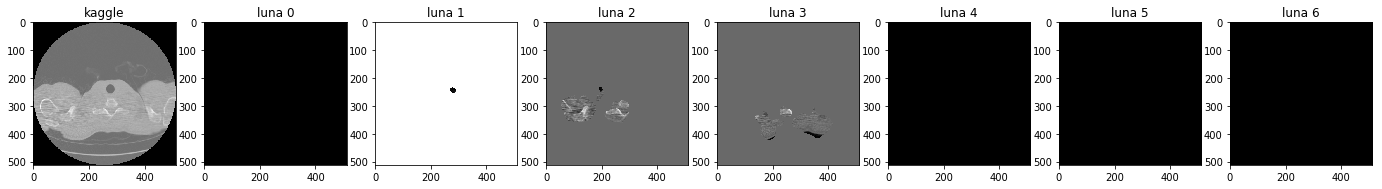

In [8]:
slice_stride = 10  # Controls the stride between each CT slice
figsize_side = 3  # Controls the size of the figure

num_slices, _, _ = numpy_img_kaggle.shape
num_masks = len(mask_images)

print("Display original image with the different masks obtained after registration side by side")

# Plot image
for i in range(0, num_slices, slice_stride):
    f, axarr = plt.subplots(1, num_masks+1, figsize=(figsize_side*(num_masks+1), figsize_side))
    axarr[0].set_title("kaggle")
    axarr[0].imshow(numpy_img_kaggle[i, :, :], cmap="gray")
    for j, mask in enumerate(numpy_mask_images.values()):
        axarr[j+1].set_title("luna %d" % (j,))
        axarr[j+1].imshow(numpy_img_kaggle[i, :, :] * mask[i, : :], cmap="gray")
    plt.show()